In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
i=load_iris()

In [3]:
dir(i)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
df=pd.DataFrame(i.data,columns=i.feature_names)

In [5]:
df['target']=i.target

In [6]:
df['species']=[i.target_names[x] for x in i.target]

In [7]:
def species_int(row):
    if row.species == 'setosa':
        return 0
    elif row.species == 'versicolor':
        return 1
    elif row.species == 'virginica':
        return 2
    else:
        return 3

In [8]:
df['target'] = df.apply(species_int,axis=1)

In [9]:
def species(row):
    if row.target == 0:
        return 'setosa'
    elif row.target == 1:
        return 'versicolor'
    elif row.target == 2:
        return 'virginica'
    else:
        return 'others'

In [10]:
df['species'] = df.apply(species,axis=1)

In [11]:
df.rename(columns={'sepal length (cm)':'sepal_length','sepal width (cm)':'sepal_width','petal length (cm)':'petal_length','petal width (cm)':'petal_width'},inplace=True)

c:\software\python3.8\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


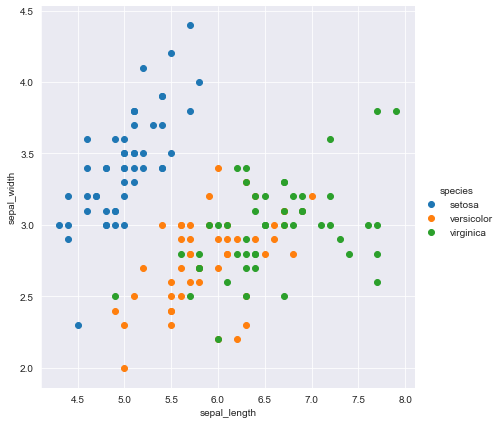

In [12]:
sns.set_style('darkgrid')
sns.FacetGrid(df,hue='species',size=6).map(plt.scatter,'sepal_length','sepal_width').add_legend()

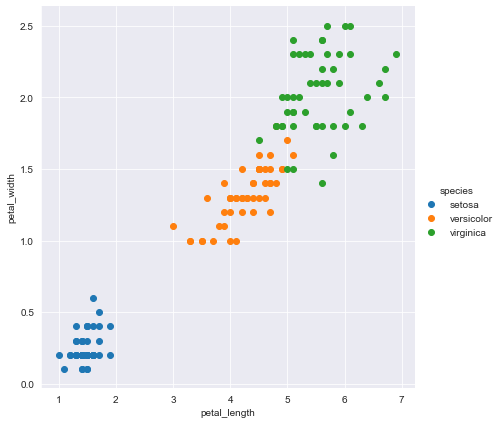

In [13]:
plt.close()
sns.set_style('darkgrid')
sns.FacetGrid(df,hue='species',size=6).map(plt.scatter,'petal_length','petal_width').add_legend()

c:\software\python3.8\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


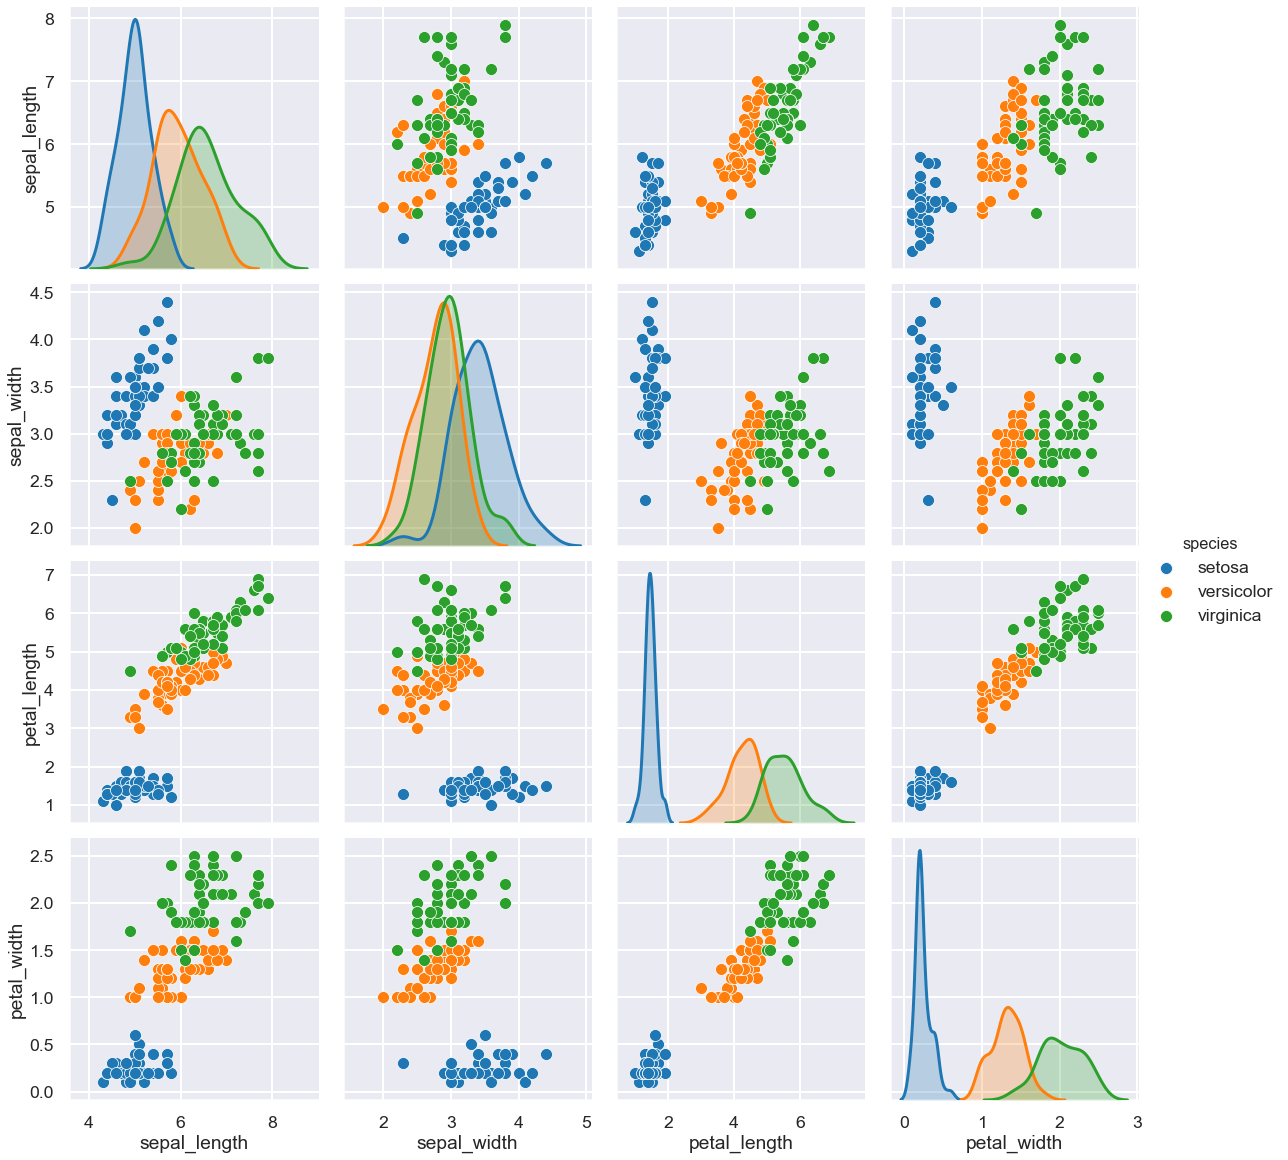

In [14]:
sns.set_style('darkgrid')
sns.set_context('poster',font_scale=0.8)
sns.pairplot(df[['sepal_length','sepal_width','petal_length','petal_width','species']],hue='species',size=4,diag_kind='kde')
#sns.reset_orig()

In [15]:
iris_setosa = df.loc[df['target'] == 0]
iris_versicolor = df.loc[df['target'] == 1]
iris_virginica = df.loc[df['species'] == 'virginica']

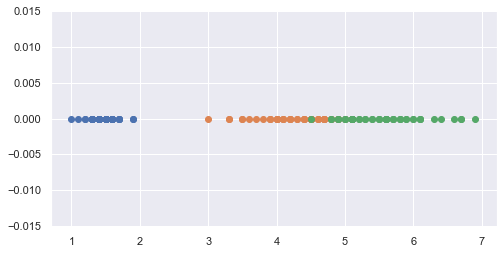

In [16]:
sns.set(rc={'figure.figsize':(8,4)})
plt.scatter(iris_setosa['petal_length'],np.zeros_like(iris_setosa['petal_length']))
plt.scatter(iris_versicolor['petal_length'],np.zeros_like(iris_versicolor['petal_length']))
plt.scatter(iris_virginica['petal_length'],np.zeros_like(iris_virginica['petal_length']))

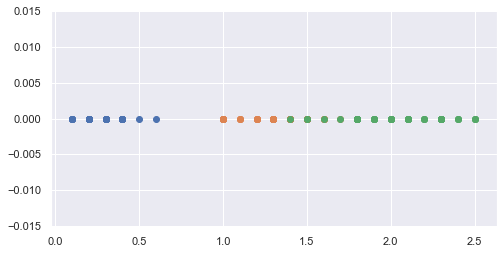

In [17]:
plt.scatter(iris_setosa['petal_width'],np.zeros_like(iris_setosa['petal_width']))
plt.scatter(iris_versicolor['petal_width'],np.zeros_like(iris_versicolor['petal_width']))
plt.scatter(iris_virginica['petal_width'],np.zeros_like(iris_virginica['petal_width']))

c:\software\python3.8\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


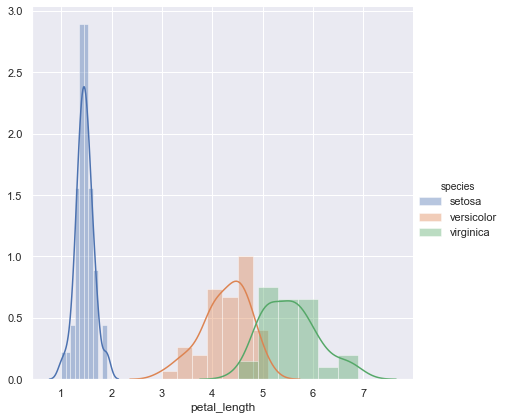

In [18]:
sns.set_style('darkgrid')
sns.FacetGrid(df,hue='species',size=6).map(sns.distplot,'petal_length').add_legend()

c:\software\python3.8\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


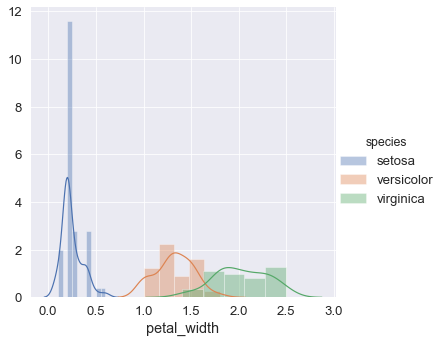

In [19]:
sns.set_context('paper',font_scale=1.5)
sns.FacetGrid(df,hue='species',size=5).map(sns.distplot,'petal_width').add_legend()

c:\software\python3.8\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


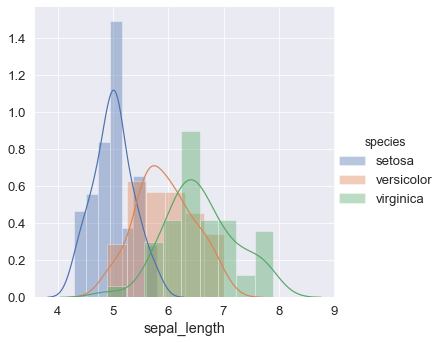

In [20]:
sns.FacetGrid(df,hue='species',size=5).map(sns.distplot,'sepal_length').add_legend()

c:\software\python3.8\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


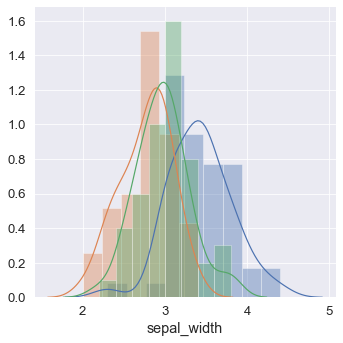

In [21]:
sns.FacetGrid(df,hue='species',size=5).map(sns.distplot,'sepal_width')

In [22]:
counts , bin_edges =np.histogram(iris_setosa['petal_length'],bins=10)

In [23]:
print('bin_edges : {}\ncounts :{}\nsum(counts) :{}'.format(bin_edges,counts,sum(counts)))

bin_edges : [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
counts :[ 1  1  2  7 13 13  7  4  0  2]
sum(counts) :50


In [24]:
#iris_setosa.loc[iris_setosa['petal_length'] == 1.5].shape

In [25]:
counts , bin_edges =np.histogram(iris_setosa['petal_length'],bins=10,density=True)

In [26]:
print('bin_edges : {}\ncounts :{}\nsum(counts) :{}'.format(bin_edges,counts,sum(counts)))

bin_edges : [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
counts :[0.22222222 0.22222222 0.44444444 1.55555556 2.88888889 2.88888889
 1.55555556 0.88888889 0.         0.44444444]
sum(counts) :11.11111111111111


In [27]:
pdf= counts/sum(counts)

In [28]:
cdf= np.cumsum(pdf)

In [29]:
print('pdf :{}\ncdf :{}'.format(pdf,cdf))

pdf :[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
cdf :[0.02 0.04 0.08 0.22 0.48 0.74 0.88 0.96 0.96 1.  ]


In [30]:
def pdfcdfplot(data):
    counts, bin_edges =np.histogram(data,bins=10)
    pdf =counts/sum(counts)
    cdf =np.cumsum(pdf)
    return pdf, cdf, bin_edges[1:]

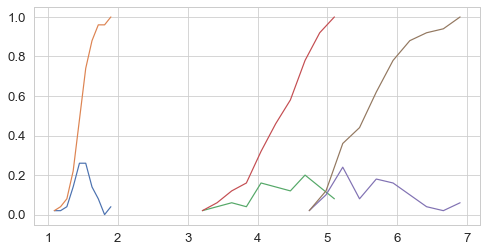

In [31]:
sns.set_style('whitegrid')
pdf ,cdf ,bin_edges =pdfcdfplot(iris_setosa['petal_length'])
plt.plot(bin_edges,pdf)
plt.plot(bin_edges,cdf)
pdf,cdf,bin_edges =pdfcdfplot(iris_versicolor['petal_length'])
plt.plot(bin_edges,pdf)
plt.plot(bin_edges,cdf)
pdf,cdf,bin_edges =pdfcdfplot(iris_virginica['petal_length'])
plt.plot(bin_edges,pdf)
plt.plot(bin_edges,cdf)

In [51]:
# Measures of Central Tendency.
print('mean of setosa : {}\nmean of versicolor : {}\nmean of virginica : {}'.format(np.mean(iris_setosa['petal_length']),np.mean(iris_versicolor['petal_length']),np.mean(iris_virginica['petal_length'])))
print('\n')
print('median of setosa : {}\nmedian of versicolor : {}\nmedian of virginica : {}'.format(np.median(iris_setosa['petal_length']),np.median(iris_versicolor['petal_length']),np.median(iris_virginica['petal_length'])))

mean of setosa : 1.4620000000000002
mean of versicolor : 4.26
mean of virginica : 5.5520000000000005


median of setosa : 1.5
median of versicolor : 4.35
median of virginica : 5.55


In [52]:
# Measures of Dispersion.
print('std of setosa : {}\nstd of versicolor : {}\nstd of virginica : {}'.format(np.std(iris_setosa['petal_length']),np.std(iris_versicolor['petal_length']),np.std(iris_virginica['petal_length'])))

std of setosa : 0.17191858538273283
std of versicolor : 0.4651881339845203
std of virginica : 0.546347874526844


In [56]:
print('iris_setosa :\n',iris_setosa.describe(),'\n')
print('iris_versicolor :\n',iris_versicolor.describe(),'\n')
print('iris_virginica :\n',iris_virginica.describe())

iris_setosa :
        sepal_length  sepal_width  petal_length  petal_width  target
count      50.00000    50.000000     50.000000    50.000000    50.0
mean        5.00600     3.428000      1.462000     0.246000     0.0
std         0.35249     0.379064      0.173664     0.105386     0.0
min         4.30000     2.300000      1.000000     0.100000     0.0
25%         4.80000     3.200000      1.400000     0.200000     0.0
50%         5.00000     3.400000      1.500000     0.200000     0.0
75%         5.20000     3.675000      1.575000     0.300000     0.0
max         5.80000     4.400000      1.900000     0.600000     0.0 

iris_versicolor :
        sepal_length  sepal_width  petal_length  petal_width  target
count     50.000000    50.000000     50.000000    50.000000    50.0
mean       5.936000     2.770000      4.260000     1.326000     1.0
std        0.516171     0.313798      0.469911     0.197753     0.0
min        4.900000     2.000000      3.000000     1.000000     1.0
25%        5